#**Автоматический градиент**

In [13]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

# w - параметр, который мы будем обучать -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)


In [14]:
# Forward шаг
y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)


tensor(1., grad_fn=<PowBackward0>)


In [15]:
# backward шаг
loss.backward()
print(w.grad)


tensor(-2.)


In [20]:
# Обновление веса
with torch.no_grad():
    w -= 0.01 * w.grad
    print(w)
# не забываем обнулить градиенты
w.grad.zero_()

tensor(1.0200, requires_grad=True)


tensor(0.)

#**Линейная регрессия**

Дан набор данных точек $\{ (x_1, t_1), (x_2, t_2), \dots, (x_N, t_N) \}$, где каждая точка $(x_i, t_i)$ содержит *значение входа* $x_i$ и *значение выхода* $t_i$. 

Используем следующую  **модель**:
$$
y_i = wx_i + b
$$

Мы хотим, чтобы ответы $y_i$ были максимально близко к реальным значениям $t_i$. Для линейной регрессии мы используем квадрат ошибки для того, чтобы измерить расстояние (отличие) между $y_i$ и $t_i$. **loss function** для этого простого примера:
$$
\mathcal{L}(y_i,t_i) = \frac{1}{2} (y_i - t_i)^2
$$

**Cost function** - это средний loss (ошибка) на всем множестве данных:
$$
\mathcal{E}(w,b) = \frac{1}{N} \sum_{i=1}^N \mathcal{L}(y_i, t_i) = \frac{1}{N} \sum_{i=1}^N \frac{1}{2} \left(wx_i + b - t_i \right)^2
$$

Мы генерируем синтетические данные {(xi,ti)}  где  xi  равномерно распределено на интервале  [0,10]  а  ti  созданы с помощью уравнение ( w=4  и  b=10 ):
ti=4xi+10+ϵ 

Здесь,  ϵ∼N(0,2)  ( ϵ  получено из Гауссовского распределения со средним значением 0 и дисперсией 2). Шум вносит некоторые случайные колебания в данные, для имитации реальых данных, которые имеют исходную закономерность, но отдельные наблюдения искажены случайным шумом.

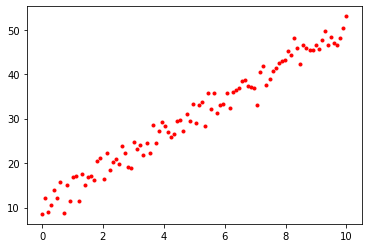

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt

N = 100  # Number of training data points
x = np.linspace(0, 10, N)

t = 4 * x + 10 + np.random.normal(0, 2, x.shape[0])
plt.plot(x, t, "r.")

x = torch.from_numpy(x)
t = torch.from_numpy(t)

In [38]:
params = {
    "w": torch.randn(1).requires_grad_(True),
    "b": torch.randn(1).requires_grad_(True),
}


def cost(params):
    y = params["w"] * x + params["b"]
    return (1 / N) * torch.sum(0.5 * (y - t) ** 2)


# Находим градиент
num_epochs = 100  # Количество эпох 1000,2000
alpha = 0.01  # Learning rate

for i in range(num_epochs):
    # Оценка градиента текущих параметров, хранящихся в params
    loss = cost(params)
    loss.backward()

    if i % 100 == 0:
        print(f"i: {i:<5d} loss: {loss.item():.4f}")

    # Обновление параметров w и b
    with torch.no_grad():
        params["w"].data = params["w"] - alpha * params["w"].grad
        params["b"].data = params["b"] - alpha * params["b"].grad
        params["w"].grad.zero_()
        params["b"].grad.zero_()

print(params)

i: 0     loss: 526.9571
{'w': tensor([5.1126], requires_grad=True), 'b': tensor([3.2297], requires_grad=True)}


[5.112556]


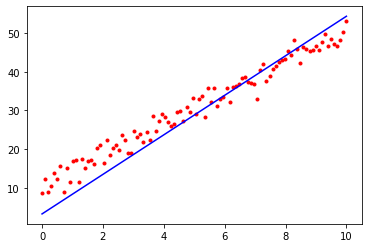

In [39]:
plt.plot(x, t, "r.")
print(params["w"].data.numpy())

b = params["b"].data.numpy()
w = params["w"].data.numpy()

plt.plot([0, 10], [b, 10*w + b], "b-")

# Регрессия: нейронные сети

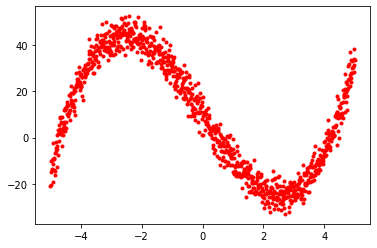

In [11]:
import numpy as np
x = np.linspace(-5, 5, 1000)
t = x ** 3 - 20 * x + 10 + np.random.normal(0, 4, x.shape[0])
plt.plot(x, t, "r.")

x = torch.from_numpy(x).float()
t = torch.from_numpy(t)


tensor(291.8239, dtype=torch.float64, grad_fn=<MulBackward0>)
i: 0     loss: 291.8239
i: 500   loss: 99.5677
i: 1000  loss: 73.2048
i: 1500  loss: 67.4759
i: 2000  loss: 63.8388
i: 2500  loss: 61.4429
i: 3000  loss: 59.8610
i: 3500  loss: 58.8231
i: 4000  loss: 58.1355
i: 4500  loss: 57.6811
i: 5000  loss: 57.3752
i: 5500  loss: 57.1752
i: 6000  loss: 57.0407
i: 6500  loss: 56.9506
i: 7000  loss: 56.8915
i: 7500  loss: 56.8512
i: 8000  loss: 56.8257
i: 8500  loss: 56.8071
i: 9000  loss: 56.7950
i: 9500  loss: 56.7860


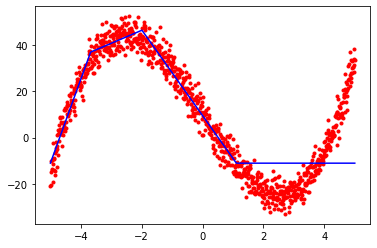

In [12]:
inputs = x.reshape(x.shape[-1], 1)

params = {
    "W1": torch.randn(1, 4).requires_grad_(True),
    "b1": torch.randn(4).requires_grad_(True),
    "W2": torch.randn(4, 4).requires_grad_(True),
    "b2": torch.randn(4).requires_grad_(True),
    "W3": torch.randn(4, 1).requires_grad_(True),
    "b3": torch.randn(1).requires_grad_(True),
}


# Оптимизация (в этом примере используется SGD).
optimizer = torch.optim.SGD(params.values(), lr=0.0001, weight_decay=0.0001, momentum=0.9)

# В Pytorch также реализован широкий спектр функций активации, таких как: Tanh, ReLU, LeakyReLU, ...
nonlinearity = torch.nn.ReLU()


def predict(params, inputs):
    h1 = nonlinearity(torch.mm(inputs, params["W1"]) + params["b1"])
    h2 = nonlinearity(torch.mm(h1, params["W2"]) + params["b2"])
    output = torch.mm(h2, params["W3"]) + params["b3"]
    return output


def cost(params):
    output = predict(params, inputs)
    return (1.0 / inputs.shape[0]) * torch.sum(0.5 * (output.reshape(output.shape[0]) - t) ** 2)

print(cost(params))

num_epochs = 10000

for i in range(num_epochs):
    # Оценrf градиентf текущих параметров, хранящихся в params
    loss = cost(params)
    if i % 500 == 0:
        print(f"i: {i:<5d} loss: {loss.item():.4f}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

with torch.no_grad():
    final_y = predict(params, inputs)
    plt.plot(x, t, "r.")
    plt.plot(x, final_y, "b-")